In [ ]:
!pip install matplotlib pandas seaborn numpy kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import OrderedDict


import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kaggle = pd.read_csv('/content/drive/My Drive/kaggle.json')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations
License(s): U.S. Government Works
100% 751M/754M [00:14<00:00, 74.0MB/s]
100% 754M/754M [00:14<00:00, 56.1MB/s]


In [ ]:
with zipfile.ZipFile('2019-airline-delays-and-cancellations.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

os.listdir('dataset')

['full_data_flightdelay.csv',
 'raw_data_documentation.txt',
 'test.csv',
 'train.csv',
 'raw_data',
 'train_sets_documentation.txt']

In [ ]:
data = pd.read_csv('dataset/full_data_flightdelay.csv')

In [ ]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
data.isnull().sum()

,0
MONTH,0
DAY_OF_WEEK,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
SEGMENT_NUMBER,0
CONCURRENT_FLIGHTS,0
NUMBER_OF_SEATS,0
CARRIER_NAME,0
AIRPORT_FLIGHTS_MONTH,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,...,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,...,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,...,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


In [ ]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Number of duplicate rows: 28473
Number of duplicate rows after removal: 0


In [ ]:
data = data[data['CARRIER_NAME'] == 'Southwest Airlines Co.']
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
47,1,7,0,0600-0659,2,1,27,129,Southwest Airlines Co.,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
48,1,7,0,0600-0659,7,1,27,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
49,1,7,0,0700-0759,9,1,29,175,Southwest Airlines Co.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
50,1,7,0,0800-0859,1,1,25,143,Southwest Airlines Co.,13056,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
len(data)

1290872

**CONVERTING TIME**

In [ ]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

data['PART_OF_DAY'] = pd.cut(
    data['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

block_num = {
    'Early Morning & Late Night': 1,
    'Morning': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Night': 5
}
data['PART_OF_DAY'] = data['PART_OF_DAY'].map(block_num)
data[['DEP_TIME_BLK', 'PART_OF_DAY']].head()

,DEP_TIME_BLK,PART_OF_DAY
0,0800-0859,2
47,0600-0659,2
48,0600-0659,2
49,0700-0759,2
50,0800-0859,2


#**Data Visualiation**

In [ ]:
excluded_cols = ['CARRIER_NAME_missing', 'DEPARTING_AIRPORT_missing', 'PREVIOUS_AIRPORT_missing']
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()

NameError: name 'data' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SEGMENT_NUMBER', data=data)
plt.title('Distribution of SEGMENT_NUMBER')
plt.xlabel('Segment Number')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
avg_delay = data.groupby('SEGMENT_NUMBER')['DEP_DEL15'].mean().reset_index()

# Barplot for average delay by segment number
plt.figure(figsize=(12, 6))
sns.barplot(x='SEGMENT_NUMBER', y='DEP_DEL15', data=avg_delay)
plt.title('Average Delay by SEGMENT_NUMBER')
plt.xlabel('Segment Number')
plt.ylabel('Average Delay (minutes)')
plt.show()

In [ ]:
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**NUM OF FLIGHTS**

In [ ]:
southwest_data = data[data['CARRIER_NAME'] == 'Southwest Airlines Co.']

# Barplot for number of flights per month for each departing airport
plt.figure(figsize=(14, 20))
sns.barplot(x='AIRLINE_FLIGHTS_MONTH', y='DEPARTING_AIRPORT', data=southwest_data, errorbar=None)
plt.title('Southwest Airlines Co. - Number of Flights per Month for Each Departing Airport')
plt.xlabel('Number of Flights per Month')
plt.ylabel('Departing Airport')
plt.show()

In [ ]:
southwest_data = data[data['CARRIER_NAME'] == 'Southwest Airlines Co.']

# Barplot for number of flights per month for each departing airport
plt.figure(figsize=(14, 20))
sns.barplot(x='AIRLINE_FLIGHTS_MONTH', y='PREVIOUS_AIRPORT', data=southwest_data, errorbar=None)
plt.title('Southwest Airlines Co. - Number of Flights per Month for Each Departing Airport')
plt.xlabel('Number of Flights per Month')
plt.ylabel('Departing Airport')
plt.show()

In [ ]:
data['Delayed'] = data['DEP_DEL15'] > 0

# Countplot for delays and non-delays by previous airport
plt.figure(figsize=(14, 8))
sns.countplot(x='DEPARTING_AIRPORT', hue='Delayed', data=data)
plt.title('Frequency of Delays and Non-Delays by Departing Airport')
plt.xlabel('Previous Airport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**PART OF DAY & DAY OF WEEK**

In [ ]:
heatmap_data = pd.pivot_table(
    data,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Time Part', fontsize=14)
plt.yticks(rotation=25)
plt.show()

**AVERAGE FLIGHT MONTH**

In [ ]:
avg_delay_by_month = data.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='DEP_DEL15', data=avg_delay_by_month, marker='o')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

**WIND SPEED**

In [ ]:
data_class0 = data[data['DEP_DEL15'] == 0]['AWND']
data_class1 = data[data['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(12, 6))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

**PERCIPITATION**

In [ ]:
plt.figure(figsize=(12, 6))
df_delayed = data[data['DEP_DEL15'] == 1]
df_not_delayed = data[data['DEP_DEL15'] == 0]
sns.histplot(df_delayed['PRCP'], color='red', label='Delayed', stat="density", bins=40, alpha=0.6, log_scale = True)
sns.histplot(df_not_delayed['PRCP'], color='lime', label='Not Delayed', stat="density", bins=40, alpha=0.6, log_scale = True)
plt.title('Histogram of Precipitation for Delayed and Non-Delayed Flights')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

**SNOW**

In [ ]:
data['Delayed'] = data['DEP_DEL15'] > 0

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='SNWD', hue='Delayed', multiple='stack', kde=False, bins=30)
plt.title('Frequency of Delays and Non-Delays by Snow Depth')
plt.xlabel('Snow Depth (SNWD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='SNOW', y='DEP_DEL15', data=data, marker='o')
plt.title('Average Flight Delays by Presence of Snow')
plt.xlabel('Snow (SNOW)')
plt.ylabel('Average Departure Delay (DEP_DEL15)')
plt.show()


**CONCURRENT FLIGHTS**

In [ ]:
avg_delay_concurrent_flights = data.groupby('CONCURRENT_FLIGHTS')['DEP_DEL15'].mean().reset_index()

# Area plot for average delay by number of concurrent flights
plt.figure(figsize=(12, 6))
plt.fill_between(avg_delay_concurrent_flights['CONCURRENT_FLIGHTS'], avg_delay_concurrent_flights['DEP_DEL15'], color="skyblue", alpha=0.4)
plt.plot(avg_delay_concurrent_flights['CONCURRENT_FLIGHTS'], avg_delay_concurrent_flights['DEP_DEL15'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Average Delay by Number of Concurrent Flights')
plt.xlabel('Number of Concurrent Flights')
plt.ylabel('Average Delay (minutes)')
plt.show()

**PLANE AGE**

In [ ]:
data['Delayed'] = data['DEP_DEL15'] > 0

# KDE plot for plane age vs. delays
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='PLANE_AGE', hue='Delayed', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Delays and Non-Delays by Plane Age')
plt.xlabel('Plane Age (years)')
plt.ylabel('Density')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DISTANCE_GROUP', hue='Delayed', data=data)
plt.title('Delays and Non-Delays by Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Delayed'] = data['DEP_DEL15'] > 0

# Histogram for number of seats by delay status
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='NUMBER_OF_SEATS', hue='Delayed', multiple='stack', bins=30)
plt.title('Number of Seats by Delay Status')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

NameError: name 'data' is not defined

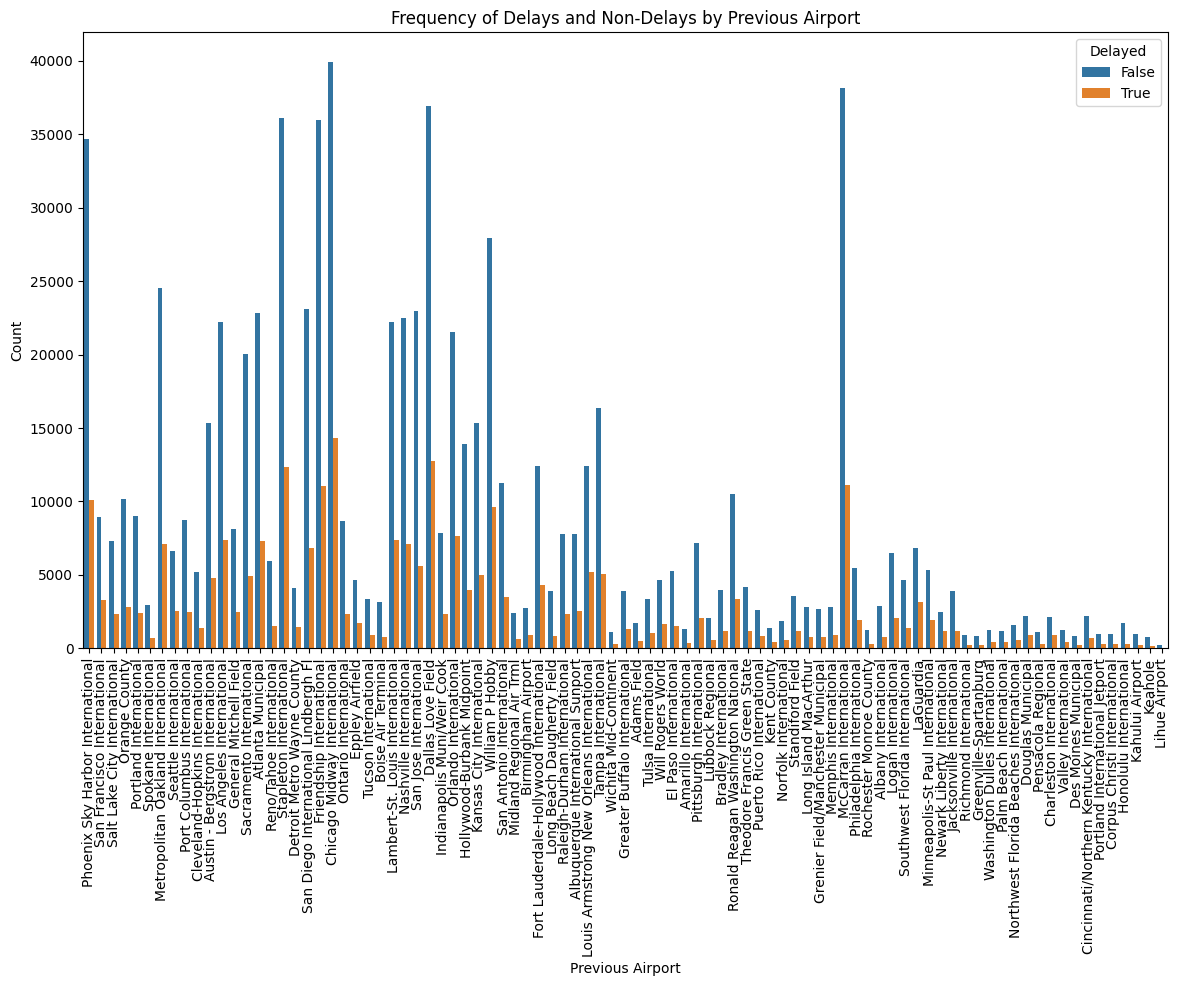

In [ ]:
data['Delayed'] = data['DEP_DEL15'] > 0

# Countplot for delays and non-delays by previous airport
plt.figure(figsize=(14, 8))
sns.countplot(x='PREVIOUS_AIRPORT', hue='Delayed', data=data)
plt.title('Frequency of Delays and Non-Delays by Previous Airport')
plt.xlabel('Previous Airport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#**Post Processing**

In [ ]:
data = data[data['PREVIOUS_AIRPORT'] != 'NONE']

In [ ]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [ ]:
len(data)

1058578

In [ ]:
# target = 'DEP_DEL15'

# delayed = data[data[target] == 1]
# not_delayed = data[data[target] == 0]

# # Downsample the non-delayed data to match the size of the delayed data
# not_delayed_downsampled = not_delayed.sample(len(delayed), random_state=42)

# # Concatenate the delayed and downsampled non-delayed data
# balanced_data = pd.concat([delayed, not_delayed_downsampled])

# # Check the length of the balanced data
# len(balanced_data), (len(balanced_data)/len(data))

(507322, 0.4792485768644351)

In [ ]:
# duplicate_rows = balanced_data.duplicated()
# print(f"Number of duplicate rows: {duplicate_rows.sum()}")

NameError: name 'balanced_data' is not defined

In [ ]:
# balanced_data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,PART_OF_DAY
123,1,7,1,1200-1259,3,2,26,175,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,Nashville International,0.0,0.0,0.0,65.0,2.91,3
131,1,7,1,1100-1159,5,2,26,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,Phoenix Sky Harbor International,0.0,0.0,0.0,65.0,2.91,2
250,1,7,1,1200-1259,7,3,26,175,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,Fort Lauderdale-Hollywood International,0.0,0.0,0.0,65.0,2.91,3
253,1,7,1,2100-2159,2,3,12,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,William P Hobby,0.0,0.0,0.0,65.0,2.91,5
262,1,7,1,1100-1159,5,3,26,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,San Diego International Lindbergh Fl,0.0,0.0,0.0,65.0,2.91,2


In [ ]:
# data.to_csv('processed_data.csv', index=False)

In [ ]:
# Save your DataFrame as a CSV file
data.to_csv('/content/drive/My Drive/processed_data.csv', index=False)

In [ ]:
# balanced_data.to_json('processed_data.json', orient='records', lines=True)